In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv("D:\Datasets\Bengaluru_House_Data.csv")

In [97]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [98]:
df.shape

(13320, 9)

In [99]:
train_data = df[:13320 - 2624]
test_data = df[13320 - 2624:]

In [100]:
train_data.shape

(10696, 9)

In [101]:
test_data.shape

(2624, 9)

In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10696 entries, 0 to 10695
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10696 non-null  object 
 1   availability  10696 non-null  object 
 2   location      10695 non-null  object 
 3   size          10682 non-null  object 
 4   society       6252 non-null   object 
 5   total_sqft    10696 non-null  object 
 6   bath          10631 non-null  float64
 7   balcony       10190 non-null  float64
 8   price         10696 non-null  float64
dtypes: float64(3), object(6)
memory usage: 752.2+ KB


In [103]:
train_data.drop('society', axis=1, inplace=True)
test_data.drop('society', axis=1, inplace=True)

C:\Users\91737\AppData\Local\Temp\ipykernel_15924\375806891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop('society', axis=1, inplace=True)
C:\Users\91737\AppData\Local\Temp\ipykernel_15924\375806891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop('society', axis=1, inplace=True)


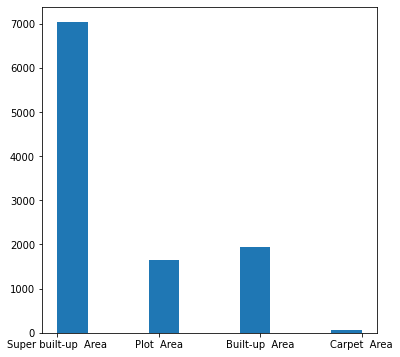

In [104]:
plt.figure(figsize=(6,6))
plt.hist(train_data['area_type'])
plt.show()

In [105]:
train_data.availability.value_counts()

Ready To Move    8501
18-Dec            238
18-May            233
18-Apr            205
18-Aug            162
                 ... 
15-Dec              1
16-Oct              1
15-Aug              1
17-Jan              1
16-Nov              1
Name: availability, Length: 79, dtype: int64

In [106]:
train_data['availability'] = train_data.availability.apply(lambda x: x if x == 'Ready To Move' else 'Currently Not')
test_data['availability'] = test_data.availability.apply(lambda x: x if x == 'Ready To Move' else 'Currently Not')

C:\Users\91737\AppData\Local\Temp\ipykernel_15924\347051232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['availability'] = train_data.availability.apply(lambda x: x if x == 'Ready To Move' else 'Currently Not')
C:\Users\91737\AppData\Local\Temp\ipykernel_15924\347051232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['availability'] = test_data.availability.apply(lambda x: x if x == 'Ready To Move' else 'Currently Not')


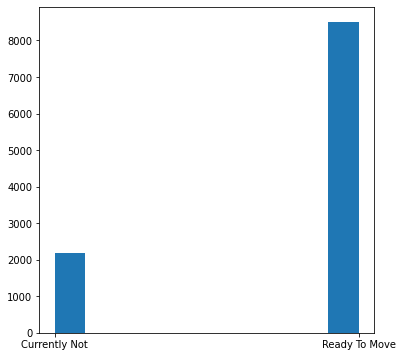

In [107]:
plt.figure(figsize=(6,6))
plt.hist(train_data['availability'])
plt.show()

In [108]:
train_data['availability'] = pd.get_dummies(train_data['availability'], drop_first=True)
test_data['availability'] = pd.get_dummies(test_data['availability'], drop_first=True)

C:\Users\91737\AppData\Local\Temp\ipykernel_15924\29428877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['availability'] = pd.get_dummies(train_data['availability'], drop_first=True)
C:\Users\91737\AppData\Local\Temp\ipykernel_15924\29428877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['availability'] = pd.get_dummies(test_data['availability'], drop_first=True)


In [109]:
train_data.isnull().sum()

area_type         0
availability      0
location          1
size             14
total_sqft        0
bath             65
balcony         506
price             0
dtype: int64

In [110]:
def convert_to_bedroom(x):
    s = str(x).split(' ')[0]
    return s

In [111]:
train_data['BHK'] = train_data['size'].apply(convert_to_bedroom)
test_data['BHK'] = test_data['size'].apply(convert_to_bedroom)

C:\Users\91737\AppData\Local\Temp\ipykernel_15924\2229972187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['BHK'] = train_data['size'].apply(convert_to_bedroom)
C:\Users\91737\AppData\Local\Temp\ipykernel_15924\2229972187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['BHK'] = test_data['size'].apply(convert_to_bedroom)


In [112]:
a = train_data['BHK'].mode().iloc[0]
train_data['BHK'] = train_data['BHK'].apply(lambda x: a if x == 'nan' else x)
test_data['BHK'] = test_data['BHK'].apply(lambda x: a if x == 'nan' else x)

C:\Users\91737\AppData\Local\Temp\ipykernel_15924\2682910142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['BHK'] = train_data['BHK'].apply(lambda x: a if x == 'nan' else x)
C:\Users\91737\AppData\Local\Temp\ipykernel_15924\2682910142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['BHK'] = test_data['BHK'].apply(lambda x: a if x == 'nan' else x)


In [113]:
train_data['BHK'] = train_data['BHK'].apply(lambda x: float(x))
test_data['BHK'] = test_data['BHK'].apply(lambda x: float(x))

C:\Users\91737\AppData\Local\Temp\ipykernel_15924\4079799218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['BHK'] = train_data['BHK'].apply(lambda x: float(x))
C:\Users\91737\AppData\Local\Temp\ipykernel_15924\4079799218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['BHK'] = test_data['BHK'].apply(lambda x: float(x))


In [114]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [115]:
train_data['total_sqft'][~train_data['total_sqft'].apply(is_float)]

30          2100 - 2850
56          3010 - 3410
81          2957 - 3450
122         3067 - 8156
137         1042 - 1105
              ...      
10488         1.25Acres
10491    86.72Sq. Meter
10541         381 - 535
10569       1230 - 1490
10620       3630 - 3800
Name: total_sqft, Length: 206, dtype: object

In [116]:
def conversion(train_data):
    a = train_data.split('-')
    if len(a) == 2:
        return (float(a[0]) + float(a[1]))/2
    try:
        return float(train_data)
    except:
        return None

In [117]:
train_data['total_sqft'] = train_data['total_sqft'].apply(conversion)
test_data['total_sqft'] = test_data['total_sqft'].apply(conversion)

C:\Users\91737\AppData\Local\Temp\ipykernel_15924\845075892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['total_sqft'] = train_data['total_sqft'].apply(conversion)
C:\Users\91737\AppData\Local\Temp\ipykernel_15924\845075892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['total_sqft'] = test_data['total_sqft'].apply(conversion)


In [118]:
num_col = ['total_sqft','bath','balcony']

In [119]:
from sklearn.impute import SimpleImputer

In [120]:
imputer = SimpleImputer(strategy='median')
train_data[num_col] = imputer.fit_transform(train_data[num_col])
test_data[num_col] = imputer.fit_transform(test_data[num_col])

C:\Users\91737\AppData\Local\Temp\ipykernel_15924\2128411496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[num_col] = imputer.fit_transform(train_data[num_col])
C:\Users\91737\AppData\Local\Temp\ipykernel_15924\2128411496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[num_col] = imputer.fit_transform(test_data[num_col])


In [121]:
train_data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       'Shanthi Pura', 'Viviani Road', 'Sampangirama Nagar'], dtype=object)

In [122]:
location_value_less_than_10 = train_data.location.value_counts()[train_data.location.value_counts() < 10]
location_value_less_than_10

Doddaballapur           9
Mahalakshmi Layout      9
Basapura                9
Mathikere               9
Bharathi Nagar          9
                       ..
Mathikere SBM colony    1
Sahyadri Layout         1
Laxminarayana Layout    1
Kanakadasa Layout       1
Sampangirama Nagar      1
Name: location, Length: 974, dtype: int64

In [123]:
train_data['location'] = train_data['location'].apply(lambda x: 'other' if x in location_value_less_than_10 else str(x).strip())

C:\Users\91737\AppData\Local\Temp\ipykernel_15924\3656549690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['location'] = train_data['location'].apply(lambda x: 'other' if x in location_value_less_than_10 else str(x).strip())


In [124]:
# train_data = pd.concat([train_data, pd.get_dummies(train_data['location'])], axis=1)

In [125]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10696 entries, 0 to 10695
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10696 non-null  object 
 1   availability  10696 non-null  uint8  
 2   location      10696 non-null  object 
 3   size          10682 non-null  object 
 4   total_sqft    10696 non-null  float64
 5   bath          10696 non-null  float64
 6   balcony       10696 non-null  float64
 7   price         10696 non-null  float64
 8   BHK           10696 non-null  float64
dtypes: float64(5), object(3), uint8(1)
memory usage: 679.1+ KB


In [126]:
train_data[train_data.location == 'nan']

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
568,Super built-up Area,1,nan,3 BHK,1600.0,3.0,2.0,86.0,3.0


In [129]:
train_data = train_data[train_data.location != 'nan']

In [130]:
from sklearn.preprocessing import OneHotEncoder
ohe_location = OneHotEncoder(sparse=False,handle_unknown='ignore')
location_transform = ohe_location.fit_transform(train_data[['location']])

In [131]:
ohe_location.categories_

[array(['1st Block Jayanagar', '1st Phase JP Nagar',
        '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
        '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
        'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
        'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
        'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
        'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
        'Badavala Nagar', 'Balagere', 'Banashankari',
        'Banashankari Stage II', 'Banashankari Stage III',
        'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
        'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
        'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
        'Begur Road', 'Bellandur', 'Benson Town', 'Bhoganhalli',
        'Billekahalli', 'Binny Pete', 'Bisuvanahalli', 'Bommanahalli',
        'Bommasandra', 'Bommasandra Industrial Area', 'Bommenahalli',

In [132]:
train_data = pd.concat([train_data,pd.DataFrame(location_transform,columns=list(ohe_location.categories_[0]))],axis=1)

In [133]:
train_data

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,0.0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Plot Area,1.0,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Built-up Area,1.0,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Super built-up Area,1.0,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Super built-up Area,1.0,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10692,Super built-up Area,1.0,other,2 BHK,993.0,2.0,2.0,42.00,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10693,Super built-up Area,1.0,Hoodi,2 BHK,1225.0,2.0,1.0,45.00,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10694,Plot Area,1.0,TC Palaya,2 Bedroom,900.0,2.0,0.0,55.00,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10695,Plot Area,0.0,Electronic City,9 Bedroom,1200.0,13.0,2.0,150.00,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
train_data = pd.concat([train_data, pd.get_dummies(train_data['area_type'])], axis=1)

In [135]:
train_data.drop('size', axis=1, inplace=True)

In [136]:
train_data['price_per_sqft'] = (train_data['price'] * 100000) / train_data['total_sqft']

In [137]:
corr = train_data.corr()
corr['price']

availability            0.028886
total_sqft              0.562326
bath                    0.456850
balcony                 0.133961
price                   1.000000
                          ...   
Built-up  Area         -0.027112
Carpet  Area           -0.016434
Plot  Area              0.274604
Super built-up  Area   -0.184683
price_per_sqft          0.025832
Name: price, Length: 238, dtype: float64

In [138]:
train_data.describe()

,availability,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area,price_per_sqft
count,10695.000000,10695.000000,10695.000000,10695.000000,10695.000000,10695.000000,10695.000000,10695.000000,10695.000000,10695.000000,...,10695.000000,10695.000000,10695.000000,10695.000000,10695.000000,10696.000000,10696.000000,10696.000000,10696.000000,1.069500e+04
mean,0.794764,1558.165960,2.686489,1.600842,112.223306,2.800000,0.001216,0.001964,0.001590,0.002525,...,0.015521,0.002899,0.001029,0.006545,0.227863,0.180722,0.006545,0.155011,0.657629,8.196068e+03
std,0.403893,1270.180475,1.352076,0.806336,142.204142,1.311114,0.034845,0.044270,0.039839,0.050184,...,0.123620,0.053763,0.032056,0.080640,0.419474,0.384805,0.080637,0.361932,0.474525,1.185009e+05
min,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.678298e+02
25%,1.000000,1100.000000,2.000000,1.000000,50.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.273885e+03
50%,1.000000,1275.000000,2.000000,2.000000,72.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.461847e+03
75%,1.000000,1677.500000,3.000000,2.000000,120.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.350427e+03
max,1.000000,52272.000000,40.000000,3.000000,2700.000000,43.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+07


<AxesSubplot:>

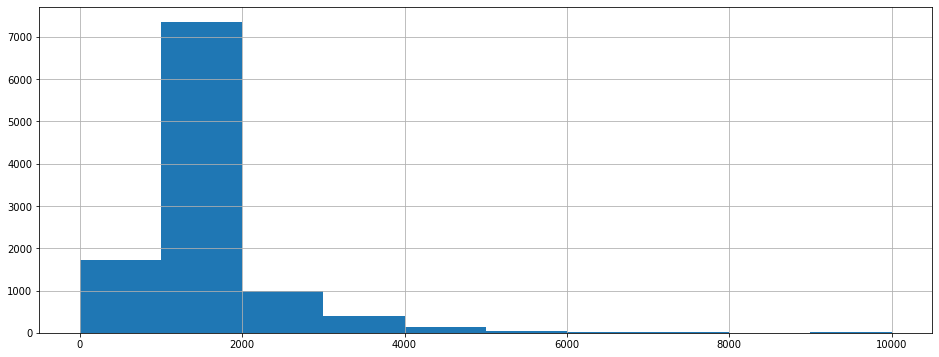

In [139]:
plt.figure(figsize=(16,6))
pd.cut(train_data['total_sqft'], bins= [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, np.inf], labels=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]).hist()

<AxesSubplot:>

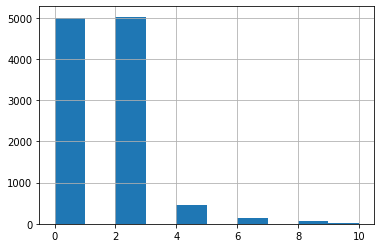

In [140]:
pd.cut(train_data['BHK'], bins=[0, 2, 4, 6, 8, 10, np.inf], labels=[0, 2, 4, 6, 8, 10]).hist()

In [141]:
train_data[train_data.total_sqft / train_data.BHK < 300].head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area,price_per_sqft
9,Plot Area,1.0,other,1020.0,6.0,2.0,370.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,1,0,36274.509804
45,Plot Area,1.0,HSR Layout,600.0,9.0,2.0,200.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,33333.333333
58,Plot Area,1.0,Murugeshpalya,1407.0,4.0,1.0,150.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,10660.980810
68,Plot Area,1.0,other,1350.0,7.0,0.0,85.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,1,0,6296.296296
70,Plot Area,1.0,other,500.0,3.0,2.0,100.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,0,1,0,20000.000000


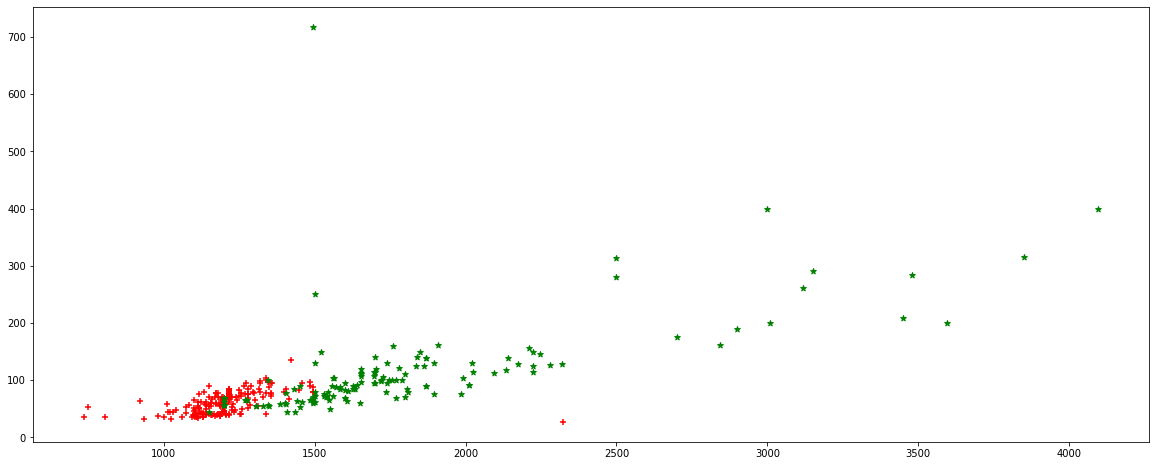

In [142]:
plt.figure(figsize=(20,8))
cond2 = ((train_data.location == 'Whitefield') & (train_data.BHK == 2))
cond3 = ((train_data.location == 'Whitefield') & (train_data.BHK == 3))
plt.scatter(train_data.loc[cond2, 'total_sqft'], train_data.loc[cond2, 'price'], marker ='+', color='red')
plt.scatter(train_data.loc[cond3, 'total_sqft'], train_data.loc[cond3, 'price'], marker ='*', color='green')
plt.show()

In [143]:
df1 = train_data[~(train_data.total_sqft / train_data.BHK < 300)]

In [144]:
df1.shape

(10086, 240)

In [145]:
df1.price_per_sqft.describe()

count     10085.000000
mean       6314.307681
std        4214.403925
min         267.829813
25%        4210.526316
50%        5307.796610
75%        6938.483548
max      176470.588235
Name: price_per_sqft, dtype: float64

In [146]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [147]:
df2 = remove_price_per_sqft_outliers(df1)

In [148]:
df2.shape

(8291, 240)

In [149]:
df3 = df2.drop(['location','area_type'],axis=1)

In [150]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8291 entries, 0 to 8290
Columns: 238 entries, availability to price_per_sqft
dtypes: float64(234), uint8(4)
memory usage: 14.8 MB


In [151]:
train_data = df3.copy()

In [152]:
train_data.isna().sum().sum()

0

In [158]:
train_data.drop('price_per_sqft',axis=1,inplace=True)

In [159]:
X = train_data.drop('price', axis=1)
y = train_data.price

In [160]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [162]:
lr_model = LinearRegression()
dct_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gbr_model = GradientBoostingRegressor()

In [163]:
model = [lr_model,dct_model,rf_model,gbr_model]
name = ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting']

In [166]:
for m,n in zip(model,name):
    score = cross_val_score(m,X,y,cv=4)
    print(f'{n} model score is ---> {score}')
    print('--------------------------------------------------------------------')

Linear Regression model score is ---> [0.54963602 0.69773335 0.67069153 0.64991572]
--------------------------------------------------------------------
Decision Tree model score is ---> [ 0.50299262  0.4896792   0.33018047 -0.59060291]
--------------------------------------------------------------------
Random Forest model score is ---> [0.5580715  0.63398903 0.61773923 0.41390452]
--------------------------------------------------------------------
Gradient Boosting model score is ---> [0.56267742 0.66649766 0.67874623 0.40523404]
--------------------------------------------------------------------


In [51]:
cross_val_score(GradientBoostingRegressor(),X_train,y_train,cv=3)

array([0.98625321, 0.91852952, 0.98799579])

In [52]:
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

In [53]:
rf_model.fit(X_train,y_train)
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [54]:
rf_model.score(X_test,y_test)

0.9551942903447715

In [55]:
gb_model.score(X_test,y_test)

0.97989653160786